In [176]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import nsepython as nse
import datetime 
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error



In [177]:
# Inputs
# Date input
prediction_date = datetime.date(year=2025, month=8, day=8)
from_date = datetime.date(year=2014,month=1,day=1).strftime("%Y-%m-%d")
to_date = (prediction_date+datetime.timedelta(days=1)).strftime("%Y-%m-%d")
print(datetime.datetime.now(),' : Date inputs taken!')

print(from_date)

2025-08-08 11:49:00.876210  : Date inputs taken!
2014-01-01


In [178]:
df = yf.download('^NSEI',start=from_date,end=to_date)
print(datetime.datetime.now(),' : Data downloaded!')


/tmp/ipykernel_20724/4025041859.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^NSEI',start=from_date,end=to_date)
[*********************100%***********************]  1 of 1 completed

2025-08-08 11:49:02.277342  : Data downloaded!


In [179]:
# Column renaming and feature selectio8n
df.columns = ['Close','High','Low','Open','Volume']
df.drop('Volume',axis=1,inplace=True)
print(datetime.datetime.now(),' : Columns renamed and fetures selecetd') 

2025-08-08 11:49:02.282557  : Columns renamed and fetures selecetd


In [180]:
# Additional features generation
df['Date'] = df.index
df['Weekday'] = df['Date'].dt.weekday+1
df['Month'] = df['Date'].dt.month
df['Week_in_year'] = df['Date'].dt.isocalendar().week
df.drop('Date',axis=1,inplace=True)
print(datetime.datetime.now(),' : Additional fetures generated!')

2025-08-08 11:49:02.290702  : Additional fetures generated!


In [181]:
# feature genration
for i in ['Open','High','Low','Close']:
    for j in ['Open','High','Low','Close']:
        df[f'{j}Wp{i}'] = round((df[j] - df[i].shift(1))/df[j]*100,2)

df['CloseWcOpen'] = round((df['Open'] - df['Close'])/df['Open']*100,2)



# for i in ['Close','Open']:
#     for j in ['High','Low']:
#         df[f'Abs{i}Wc{j}'] = round(abs(df[i] - df[j])/df[i]*100,2)

cols = df.columns.tolist()

for i in [3,5,9]:
    for j in cols:
        df[f'rm{i}_{j}'] = df[j].rolling(i).mean()
        df[f'rstd{i}_{j}'] = df[j].rolling(i).std()
        


df.drop(['High','Open','Low','Close'],axis=1,inplace=True)
df.dropna(inplace=True)

        
print(datetime.datetime.now(),' : Features generated and cleaned!')

2025-08-08 11:49:02.345540  : Features generated and cleaned!


/tmp/ipykernel_20724/3618790735.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'rm{i}_{j}'] = df[j].rolling(i).mean()
/tmp/ipykernel_20724/3618790735.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'rstd{i}_{j}'] = df[j].rolling(i).std()
/tmp/ipykernel_20724/3618790735.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

In [182]:
# Train test split
df['NxtCloseWpClose'] = df['CloseWpClose'].shift(-1)
df['NxtOpenWpClose'] = df['OpenWpClose'].shift(-1)
df['NxtOpenWpOpen'] = df['OpenWpOpen'].shift(-1)
df['NxtOpenWpHigh'] = df['OpenWpHigh'].shift(-1)
df['NxtOpenWpLow'] = df['OpenWpLow'].shift(-1)  

X_train, X_test, y_train, y_test = train_test_split(df.drop('NxtCloseWpClose',axis=1),
                                                    df['NxtCloseWpClose'],
                                                    test_size=0.2,
                                                    shuffle=False)


X_test = X_test.iloc[:-1]
y_test = y_test.iloc[:-1]


print(datetime.datetime.now(),' : Train test split done')


2025-08-08 11:49:02.361663  : Train test split done


/tmp/ipykernel_20724/2264867336.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NxtCloseWpClose'] = df['CloseWpClose'].shift(-1)
/tmp/ipykernel_20724/2264867336.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NxtOpenWpClose'] = df['OpenWpClose'].shift(-1)
/tmp/ipykernel_20724/2264867336.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [183]:
# Model initiated
model = XGBRegressor()
print(datetime.datetime.now(),' : XG Booster regression model initiated with default parameters')


2025-08-08 11:49:02.366089  : XG Booster regression model initiated with default parameters


In [184]:
# Model fitting
model.fit(X_train,y_train)
print(datetime.datetime.now(),' : Model fitted!')


2025-08-08 11:49:03.479446  : Model fitted!


In [185]:
# Prediction for test set
y_pred = pd.Series(model.predict(X_test),index=X_test.index)
print(datetime.datetime.now(),' : Predictions made for test set!')


2025-08-08 11:49:03.493673  : Predictions made for test set!


In [186]:
# Rmse calculation
rmse = root_mean_squared_error(y_test,y_pred)
print(datetime.datetime.now(),' : Root mean squared error calculated!')

2025-08-08 11:49:03.500434  : Root mean squared error calculated!


In [187]:
# Rmse display
print("Root Mean Squared Error :")
print("For given test data")
print("on an average")
print(f"predicted value falls within +/- {rmse:.2f} % range of actual index price")

Root Mean Squared Error :
For given test data
on an average
predicted value falls within +/- 0.77 % range of actual index price


In [188]:
# Prediction on given date 
result = y_pred.iloc[-1:]
result = float(result.values[0])
print(datetime.datetime.now(),' : Prediction done!')

2025-08-08 11:49:03.510481  : Prediction done!


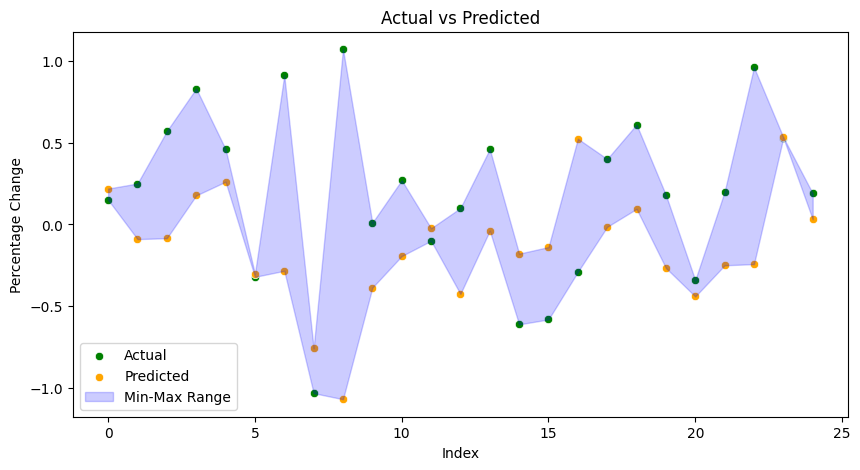

2025-08-08 11:49:03.624865  : latest 25 predicted and corresponding actual avlues plotted! 


In [189]:
# Prediction for last n values
n = 25
pred_table = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred_table.reset_index(inplace=True)
data = pred_table.reset_index()[:n]
plt.figure(figsize=(10,5))
sns.scatterplot(x=data.index,y=data['Actual'],color='green',label='Actual')
sns.scatterplot(x=data.index,y=data['Predicted'],color='orange',label='Predicted')
y_min = []
y_max = []
for i in range(len(data)):
    y_min.append(min(data['Actual'][i],data['Predicted'][i]))
    y_max.append(max(data['Actual'][i],data['Predicted'][i]))
plt.fill_between(data.index,y_min,y_max,alpha=0.2,color='blue',label='Min-Max Range')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Percentage Change')
plt.show()
print(datetime.datetime.now(),f' : latest {n} predicted and corresponding actual avlues plotted! ')

In [190]:
# Prediction table for test data 

pred_table = pd.DataFrame()
pred_table['Actual']= y_test
pred_table['Predicted'] = y_pred
pred_table['Error'] = abs(pred_table['Actual'] - pred_table['Predicted'])
pred_table['Within_rmse_range'] = pred_table['Error'] <= rmse
print(datetime.datetime.now(),' : Prediction table for test data created!') 
result_probability = float(pred_table['Within_rmse_range'].value_counts(normalize=True).loc[:'True'].values[0])

2025-08-08 11:49:03.632542  : Prediction table for test data created!


In [ ]:
# Result Display
print("**Result**")
lower_value = result - rmse
upper_value = result + rmse
print(f"On {prediction_date}")
print(f"Change in close w.r.t. prev close is likely to be in the range of {lower_value:.2f} % to {upper_value:.2f} %")
print(f"with probability of {result_probability:.2f} %")


**Result**
On 2025-08-08
Change in close w.r.t. prev close is likely to be in the range of -1.55 % to -0.01 %
with probability of 0.75 %


In [ ]:
# range prediction with probability
p = []
v = []
for i in range(1,101):
    e = np.percentile(pred_table['Error'],i)
    p.append(i)
    lv = round((result - e  ),2)   
    uv = round((result + e),2)
    v.append((lv,uv))

prob_val_table = pd.DataFrame({'Probability':p,
                               'Prediction_range':v})

print("Prediction_range = Change in close w.r.t. previous close in %")                          
prob_val_table


Prediction_range = Change in close w.r.t. previous close in %


,Probability,Prediction_range
0,1,"(-0.79, -0.77)"
1,2,"(-0.8, -0.76)"
2,3,"(-0.8, -0.75)"
3,4,"(-0.81, -0.74)"
4,5,"(-0.82, -0.73)"
...,...,...
95,96,"(-2.34, 0.78)"
96,97,"(-2.49, 0.94)"
97,98,"(-2.71, 1.15)"
98,99,"(-3.11, 1.55)"


Within_rmse_range
True     0.746479
False    0.253521
Name: proportion, dtype: float64

Interpretation:
74.65 % of time range predicted was correct!


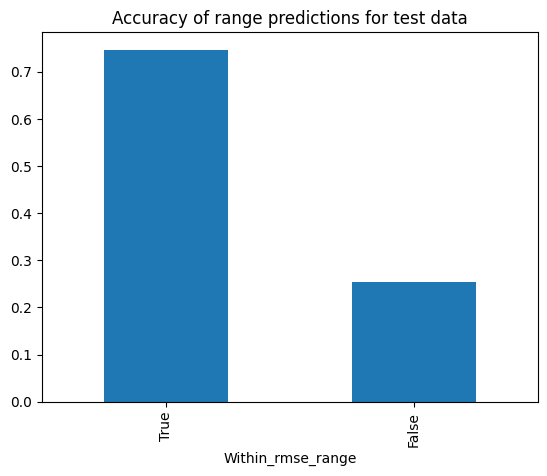

In [ ]:
# Accuracy plot
pred_table['Within_rmse_range'].\
value_counts(normalize=True).\
plot(kind='bar',
     title='Accuracy of range predictions for test data')
print(pred_table['Within_rmse_range'].value_counts(normalize=True))
print("\nInterpretation:")
print(f"{result_probability*100:.2f} % of the time range predicted was correct!")